In [20]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

Student name:  Tom Keane

Student ID: 20214537

Please use this notebook to implement task 1. Do not forget to replace IDnumber in the filename with your ID number.

#This is an algorithm which allows the user to calculate the probabilistic mean (u) and standard deviation (SD) for the sum of X number of S sided die being thrown N times.

#The values u and SD are calculated from N number of simluations and then compared to the values calculated by theoretical means.

#https://www.universalclass.com/articles/math/statistics/calculating-mean-standard-deviation-distribution.htm

#in the above link, we can see that for a single six sided die, u = 3.5 & SD = 1.71..

#THEORETICAL CALCULATIONS

#For the mean, one just needs to sum means of die

#standard dev = sqrt(Var( X1 + X2 +... Xn)), where n is the num of die
#Var(X) = Expected Value of X^2 - (Expected value of X)^2

#https://math.stackexchange.com/questions/2686063/standard-deviation-for-sums-of-fair-dice-given-the-number-of-dice-and-the-numbe


In [26]:
def calcTheoreticalMean(numOfDie, sidesOnDice):
    mean = float(0)
    die = range(1,sidesOnDice+1)
    dieMean = (1/sidesOnDice)*sum(die)
    for i in die:
        mean = dieMean*numOfDie
    return mean
#test
calcTheoreticalMean(1,6)

3.5

In [28]:


def calcTheoreticalStandardDev(numOfDie, sidesOnDice):
    die = range(1,sidesOnDice+1)
    Ex2 = (1/sidesOnDice)*sum([i**2 for i in die])
    Ex = (1/sidesOnDice)*sum(die)
    standardDev = (numOfDie*(Ex2 - Ex**2))**0.5
    return standardDev
#test
calcTheoreticalStandardDev(1,6)

1.707825127659933

In [29]:
def calcTheoreticalMean_and_StandardDev(numOfDie, sidesOnDice):
    return {
        "mean": calcTheoreticalMean(numOfDie, sidesOnDice),
        "standardDeviation": calcTheoreticalStandardDev(numOfDie, sidesOnDice)
    }

In [30]:
def simulateDiceThrow(sides):
    return random.randint(1,sides)

In [31]:
def throwDice(numOfDice, sides):
    count = 0
    for i in range(numOfDice):
        count += simulateDiceThrow(sides)
    return count
#test
throwDice(2,6)

11

In [32]:
def performThrowSimulations(numTries, numOfDice, sidesOnDice):
    throwResults = []
    for i in range(numTries):
        throwResults.append(throwDice(numOfDice, sidesOnDice))
    return throwResults

In [33]:
#https://www.mathsisfun.com/data/standard-deviation-formulas.html
def getStandardDevOfThrows(throwResults, mean):
    squaredDiffs = []
    for i in throwResults:
        squaredDiffs.append( (i - mean)**2 )
    return (sum(squaredDiffs)/len(squaredDiffs))**0.5

In [34]:
def createThrowStatistics(throwResults):
    mean = sum(throwResults)/len(throwResults)
    SD = getStandardDevOfThrows(throwResults, mean)
    return {
        "mean": mean,
        "standardDeviation": SD
    }

In [35]:
def analyzeStatistics(simulationStatistics, expectedStatistics):
    return {
        "mean % diff": 100*abs(simulationStatistics["mean"] - expectedStatistics["mean"])/expectedStatistics["mean"],
    "standard deviation % diff": 100*abs(simulationStatistics["standardDeviation"] - expectedStatistics["standardDeviation"])/expectedStatistics["standardDeviation"]
    }

In [36]:
class diceThrowTestCase:
    def __init__(self, numThrows, numOfDice, numOfSides):
        self.numThrows = numThrows
        self.numOfDice = numOfDice
        self.numOfSides = numOfSides
    throwResults = 0
    simulationStatistics = 0
    expectedStatistics = 0
    resultAnalysis = 0

    def performDiceTests(self):
        numThrows = self.numThrows
        numOfDice = self.numOfDice
        numOfSides = self.numOfSides

        print("throwing "+str(numOfDice)+" "+str(numOfSides)+"-sided die " +str(numThrows) +" times\n")

        self.throwResults = performThrowSimulations(numThrows, numOfDice, numOfSides)
        self.simulationStatistics = createThrowStatistics( self.throwResults )
        self.expectedStatistics = calcTheoreticalMean_and_StandardDev(numOfDice, numOfSides)
        self.resultAnalysis = analyzeStatistics(self.simulationStatistics, self.expectedStatistics)

        self.printStats(self.simulationStatistics, self.expectedStatistics, self.resultAnalysis)
    
    def printStats(self, simulationStatistics, expectedStatistics, resultAnalysis):
        print("simulationStatistics     "+str(simulationStatistics))
        print()
        print("expectedStatistics     "+str(expectedStatistics))
        print()
        print("% difference of simulated & expecetd values\n"+str(resultAnalysis))
        print("\n___________________\n")
    
    #https://stackoverflow.com/questions/30112420/histogram-for-discrete-values-with-matplotlib
    def plotData(self):
        data = np.array(self.throwResults)
        d = np.diff(np.unique(data)).min()
        left_of_first_bin = data.min() - float(d)/2
        right_of_last_bin = data.max() + float(d)/2
        plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

        plt.xlabel("Throw Results")
        plt.ylabel("Occurences")
        plt.title("Monte Carlo results for "+str(self.numOfDice)+" "+str(self.numOfSides)+"-sided di(c)e being thrown "+str(self.numThrows)+" times")

        plt.show()

In [37]:
test1 = diceThrowTestCase(100000, 1, 6)
test2 = diceThrowTestCase(100000, 2, 6)
test3 = diceThrowTestCase(100000, 3, 6)
test50 = diceThrowTestCase(100000, 3, 1000)

throwing 1 6-sided die 100000 times

simulationStatistics     {'mean': 3.502, 'standardDeviation': 1.711349175358464}

expectedStatistics     {'mean': 3.5, 'standardDeviation': 1.707825127659933}

% difference of simulated & expecetd values
{'mean % diff': 0.05714285714285085, 'standard deviation % diff': 0.20634710436422996}

___________________



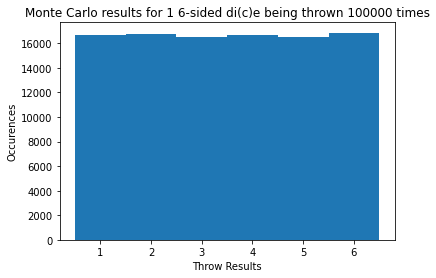

In [38]:
test1.performDiceTests()
test1.plotData()

throwing 2 6-sided die 100000 times

simulationStatistics     {'mean': 6.98702, 'standardDeviation': 2.420489933793897}

expectedStatistics     {'mean': 7.0, 'standardDeviation': 2.4152294576982394}

% difference of simulated & expecetd values
{'mean % diff': 0.18542857142856814, 'standard deviation % diff': 0.21780440276143223}

___________________



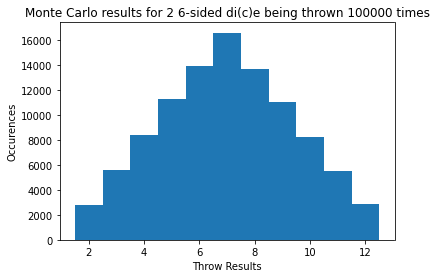

In [39]:
test2.performDiceTests()
test2.plotData()

throwing 3 6-sided die 100000 times

simulationStatistics     {'mean': 10.5095, 'standardDeviation': 2.9573890089051416}

expectedStatistics     {'mean': 10.5, 'standardDeviation': 2.9580398915498076}

% difference of simulated & expecetd values
{'mean % diff': 0.09047619047618263, 'standard deviation % diff': 0.022003849458738865}

___________________



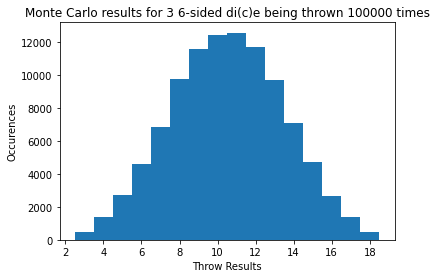

In [40]:
test3.performDiceTests()
test3.plotData()

throwing 3 1000-sided die 100000 times

simulationStatistics     {'mean': 1499.60694, 'standardDeviation': 499.74557541196634}

expectedStatistics     {'mean': 1501.5, 'standardDeviation': 499.9997499999375}

% difference of simulated & expecetd values
{'mean % diff': 0.12607792207792906, 'standard deviation % diff': 0.050834943011705}

___________________



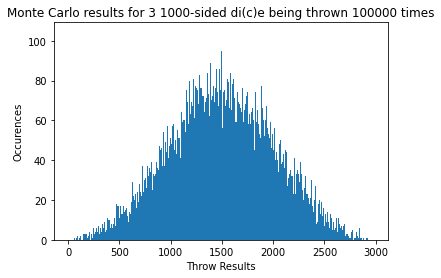

In [41]:
test50.performDiceTests()
test50.plotData()